# Foundation of Graphics

---

## 01 Transformations

### Revision: Cross product

$u \times v = |u| \ |v| \sin \theta c$ where $c$ is a unit vector othogonal to both $u$ and $v$ (right-hand rule). $u\times v$ is the oriented area of a parallelogram.

In [109]:
import numpy as np
from math import pi, sin, radians
vec = lambda a : np.array(a)
norm = lambda a : np.linalg.norm(a)

u = vec([1, 0, 0])
v = vec([0.5, 0.5, 0])

u_norm = norm(u)
v_norm = norm(v)
theta = radians(45)

res = u_norm * v_norm * sin(theta)

print(np.cross(u, v), "cross product (normal)")
print(res, "cross product (with angle)")

[ 0.   0.   0.5] cross product (normal)
0.5 cross product (with angle)


### affine combination

If the coord system is already defined: position $p$ and vector $v$ are synonyms.

The set $\biggr\{ v \in V \ | \ v = \sum_{i=0}^n \lambda_i, v_i \ \ \mathrm{with} \ \ \sum_{i=0}^n \lambda=1 \biggr\}$ is called **affine combination** of vectors $v_i$.

### Barycentric Coordinates

If a coord system $B=\{p_0, ..., p_n \}$ is given in affine space $A$ and the point $p$ is given as affine combination w.r.t. given coordinate system

$$
p=\sum_{i=0}^n \lambda_i p_i \ \ \ \ \ \ \ \mathrm{with} \ \ \ \ \lambda_i\geq 1; \ \ \ \sum_{i=0}^n \lambda_i = 1
$$

then the coefficients $\lambda_i$ are called **barycentric coordinates** of $p$. This is motivated by the fact that if the $n+1$ points $p_i$ are interpreted as masses with weights $m_i=\lambda_i$ then $p$ can be seen as the **center of gravity (barycenter)** of the masses:

$$
\lambda_0 = \frac{||p_1 - p||}{||p_1 - p_0||} \ \ \ \ \ \ \lambda_1 = \frac{
||p - p_0||
}{||p_1 - p_0||} \ \ \ \ \ \  \lambda_0 + \lambda_1 = 1
$$

0.6 vs 0.6
0.4 vs 0.4


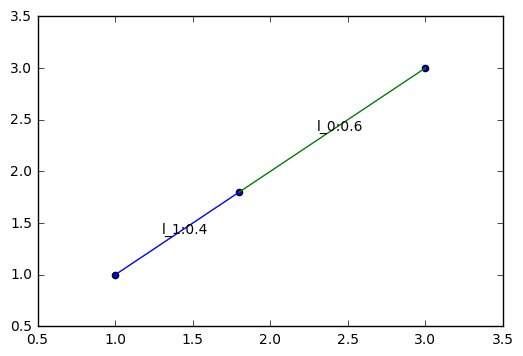

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import sum as vsum
p0, p1 = vec([1,1]), vec([3,3])
lambda0, lambda1 = 0.6, 0.4

p = p0 * lambda0 + p1 * lambda1

print(lambda0, "vs", norm(p1-p)/norm(p1-p0))
print(lambda1, "vs", norm(p-p0)/norm(p1-p0))

P = vec([p0, p, p1])

plt.scatter(P[:,0], P[:,1])
plt.plot([p0[0], p[0]], [p0[1], p[1]])
plt.text(p0[0]/2 + p[0]/2 - 0.1, p0[1]/2 + p[1]/2, 'l_1:' + str(lambda1))
plt.plot([p1[0], p[0]], [p1[1], p[1]])
plt.text(p[0]/2 + p1[0]/2 - 0.1, p[1]/2 + p1[1]/2, 'l_0:' + str(lambda0))
plt.show()

### Barycentric Coordinates (Triangle)

$$
\lambda_0 = \frac{A(\triangle(p, p_1, p_2))}{A(\triangle(p_0, p_1, p_2))} \ \ \ \ \ 
\lambda_1 = \frac{A(\triangle(p, p_2, p_0))}{A(\triangle(p_0, p_1, p_2))} \ \ \ \ \
\lambda_2 = \frac{A(\triangle(p, p_0, p_1))}{A(\triangle(p_0, p_1, p_2))}
$$

$$p = \lambda_0 p_0 + \lambda_1 p_1 + \lambda_2 p_2$$

$$A(\triangle(p_0, p_1, p_2)) = \frac{1}{2} (p_1-p_0) \times (p_2 - p_0)$$

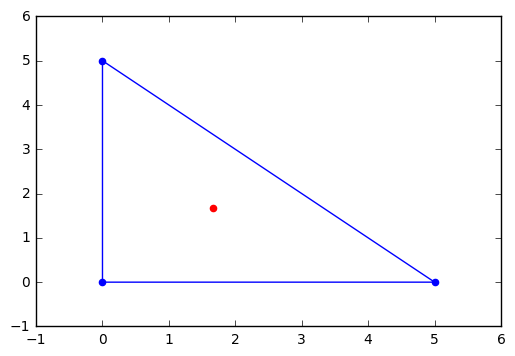

In [88]:
A_triangle = lambda p : 1/2 * np.cross(p[1] - p[0], p[2] - p[0])

def plot_triangle(ax, p0, p1, p2, color='blue'):
    P = vec([p0, p1, p2])
    ax.scatter(P[:,0], P[:,1], color=color)
    ax.plot([p0[0], p1[0], p2[0], p0[0]], [p0[1], p1[1], p2[1], p0[1]], color=color)
    
p0 = vec([0, 0])
p1 = vec([0, 5])
p2 = vec([5, 0])

lambda0, lambda1, lambda2 = 1/3, 1/3, 1/3

plot_triangle(plt, p0, p1, p2)

p = lambda0 * p0 + lambda1 * p1 + lambda2 * p2

plt.scatter(p[0], p[1], color='red')

plt.show()

### Convex hull

The set $\mathrm{co} \{p_0, ..., p_n \} = \biggr\{ 
p \ \big| \ p = \sum_{i=0}^n \lambda_i p_i, \ \ \ \ \sum_{i=0}^n \lambda_i = 1, \ \ \ \mathrm{and} \ \ \lambda_i \geq 0
\biggr\}$ is the **convex hull** of the points $p_0, ..., p_n$.

### Affine mapping

A mapping $\Phi$ between two affine vector spaces $A_1$ and $A_2$ is called **affine**, iff 
$\Phi: A_1 \rightarrow A_2 \ \ \ \ \ \Phi\biggr( \sum_{i=0}^n \lambda_i p_i \biggr) = \sum_{i=0}^n \lambda_i \Phi(p_i)$ holds for every vector of weights $\lambda_0, ..., \lambda_1 \in R_{\geq 0}$ with $\sum_i^n \lambda_i = 1$

**Properties**:
* Lines are mapped onto lines
* Finite objects remain finite
* Parallel objects remain parallel
* Ratios of length, areas and volumes are kept

### Rigid Transformations

A transformation $T$ is called **rigid** if for all $x, y \in R^3 : \ \ || \ T(x) - T(y) \ || \ = || \ x - y \ ||$
Rigid transformations are affine and can be represented by
* Rotantions (linear)
* Mirroring (linear)
* Translation (non-linear, fix by using homogenous coords)

---

## Physically-Based Rendering

### Rendering pipeline

** (1) Scene **
* Geometry
* Light sources
* Material / scattering functions
* Camera / sensor

** (2) Optical simulation **
* Sampling
* Monte-Carlo Integration
* Efficient data structures
* Ray Casting/Tracing

** (3) Virtual image/measurement**
* Image reconstruction techniques

## Ray Casting

* For each pixel:
    * Starting at the eye: trace light rays backwards through the virtual scene until ray first hits geometry
    * Test if hit point is in shadow
        * **Yes**: no night gets reflected to eye
        * **No** some light gets reflected to eye according to matrial property

### Ray Parametric Form

Ray expressed as function of a single parameter $(t)$: $(x,y,z) = (x_0, y_0, z_0) + t(x_d, y_d, z_d) = \vec{r}_0 + t\vec{r}_d$

### Triangle Intersection

At what point $p$ does ray intersect triangle?

#### Step 1: Intersect ray with plane
Normal form: $\vec{n} \cdot \vec{x} + D = Ax + Bx + Cz + D = 0$

Substituting $\vec{x}$ by ray parametric ray form , solving for $t$ yields: $t = - \frac{\vec{n}\cdot \vec{r}_0 + D}{\vec{n} \cdot \vec{r}_d}$

In [89]:
r0 = vec([5,10,-1])
rd = vec([1,0,0])

# A    B    C    D
# 2x + 3y + 4z + 5 = 0
n = vec([-1, 0.5, 0])
n = n/norm(n)
D = 25

print("'angle:'" + str(rd @ n))



res = -(r0 @ n + D) / (rd @ n)

print(res)

'angle:'-0.894427191
27.9508497187


#### Step 2: Triangle intersection

Is $\vec{p}$ inside triangle?

Check sign of $E_i = (\vec{v_i v_{i+1}} \times \vec{v_1p}) \cdot \vec{n}$ for **each** Edge:
* Indicates if $\vec{p}$ is *left* or *right* to the i'th edge
* If signs are all positive or negative, point is inside triangle

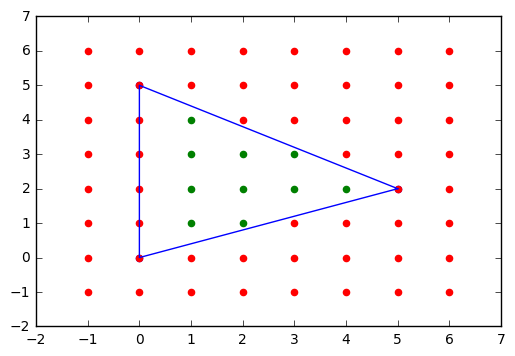

In [108]:
v0 = vec([5, 2, 0])
v1 = vec([0, 5, 0])
v2 = vec([0, 0, 0])
n = vec([0, 0, 1])

E0 = lambda p: np.cross(v0-v1, v0-p) @ n 
E1 = lambda p: np.cross(v1-v2, v1-p) @ n 
E2 = lambda p: np.cross(v2-v0, v2-p) @ n 

def is_inside(p):
    edge0, edge1, edge2 = E0(p), E1(p), E2(p)
    return np.sign(edge0) == np.sign(edge1) == np.sign(edge2)
    

plot_triangle(plt, v0, v1, v2)
    
for x in range(-1, 7):
    for y in range(-1, 7):
        p = vec([x,y,0])
        color = 'green' if is_inside(p) else 'red'
        plt.scatter(p[0], p[1], color=color)

### The Rendering Equation (for surfaces)

$$
L_0(\vec{x}, \vec{\omega}_0) = L_e(\vec{x}, \vec{\omega}_0) + \int_\Omega f(\vec{\omega}_i, \vec{\omega}_0)
L_i(\vec{x}, \vec{\omega}_i) \big< \vec{\omega}_i, \vec{n} \big> \ \ d\vec{\omega}_i
$$

* $L_e$: Emission
* $f$: Scattering function (BRDF)
* $L_i$: Incoming Radiance
* $\big<\vec{\omega}_i, \vec{n}\big>$: *Cosine term*
* $f, L_i, \big<\vec{\omega}_i, \vec{n}\big>$: Reflection